Lab | Customer Analysis Round 2

Dealing with the data

1. Show the dataframe shape.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
%matplotlib inline



In [3]:

mkt_cust = pd.read_csv('marketing_customer_analysis.csv')
mkt_cust.shape

(10910, 26)

In [4]:
mkt_cust

Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0         Basic   College           2/18/11         Employed      M  ...   
1         Basic   College           1/18/11       Unemployed      F  ...   
2         Basic  Bachelor           2/10/11         Employed      M  ...   
3      Extended   College           1/11/11         Employed      M  ...   
4       Premium  Bachelor           1/17/11    Medical Leave      F  ...   
...         ...       ...               ...              ...    ...  ...   
10905   Premium  Bachelor           1/19/11       Unemployed      F  ...   
10906     Basic   College            1/6/11         Employed      F  ...   
10907  Extended  Bachelor            2/6/11         Employed      F  ...   
10908   Premium   College           2/13/11         Employed      F  ...   
10909     Basic  Bachelor            1/8/11       Unemployed      M  ...   

       Number of Open Complaints Number of Policies     Policy Type  \
0                            0.0                  9  Corporate Auto   
1                            0.0                  1   Personal Auto   
2                            0.0                  2   Personal Auto   
3                            0.0                  2  Corporate Auto   
4                            NaN                  7   Personal Auto   
...                          ...                ...             ...   
10905                        NaN                  7   Personal Auto   
10906                        0.0                  6   Personal Auto   
10907                        0.0                  2  Corporate Auto   
10908                        4.0                  6   Personal Auto   
10909                        0.0                  3   Personal Auto   

             Policy  Renew Offer Type  Sales Channel  Total Claim Amount  \
0      Corporate L3            Offer3          Agent          292.800000   
1       Personal L3            Offer4    Call Center          744.924331   
2       Personal L3            Offer3    Call Center          480.000000   
3      Corporate L3            Offer2         Branch          484.013411   
4       Personal L2            Offer1         Branch          707.925645   
...             ...               ...            ...                 ...   
10905   Personal L1            Offer3            Web         1214.400000   
10906   Personal L3            Offer2         Branch          273.018929   
10907  Corporate L3            Offer1            Web          381.306996   
10908   Personal L1            Offer1         Branch          618.288849   
10909   Personal L1            Offer4            Web         1021.719397   

       Vehicle Class Vehicle Size Vehicle Type  
0      Four-Door Car      Medsize          NaN  
1      Four-Door Car      Medsize          NaN  
2                SUV      Medsize            A  
3      Four-Door Car      Medsize            A  
4      Four-Door Car      Medsize          NaN  
...              ...          ...          ...  
10905     Luxury Car      Medsize            A  
10906  Four-Door Car   

2. Standardize header names.

In [5]:
mkt_cust.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [6]:
# removed unnamed:0 column

mkt_cust = mkt_cust.drop(['Unnamed: 0'], axis=1)
mkt_cust

Customer       State  Customer Lifetime Value Response  Coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      Education Effective To Date EmploymentStatus Gender  Income  ...  \
0       College           2/18/11         Employed      M   48029  ...   
1       College           1/18/11       Unemployed      F       0  ...   
2      Bachelor           2/10/11         Employed      M   22139  ...   
3       College           1/11/11         Employed      M   49078  ...   
4      Bachelor           1/17/11    Medical Leave      F   23675  ...   
...         ...               ...              ...    ...     ...  ...   
10905  Bachelor           1/19/11       Unemployed      F       0  ...   
10906   College            1/6/11         Employed      F   61146  ...   
10907  Bachelor            2/6/11         Employed      F   39837  ...   
10908   College           2/13/11         Employed      F   64195  ...   
10909  Bachelor            1/8/11       Unemployed      M       0  ...   

      Number of Open Complaints Number of Policies     Policy Type  \
0                           0.0                  9  Corporate Auto   
1                           0.0                  1   Personal Auto   
2                           0.0                  2   Personal Auto   
3                           0.0                  2  Corporate Auto   
4                           NaN                  7   Personal Auto   
...                         ...                ...             ...   
10905                       NaN                  7   Personal Auto   
10906                       0.0                  6   Personal Auto   
10907                       0.0                  2  Corporate Auto   
10908                       4.0                  6   Personal Auto   
10909                       0.0                  3   Personal Auto   

             Policy  Renew Offer Type  Sales Channel  Total Claim Amount  \
0      Corporate L3            Offer3          Agent          292.800000   
1       Personal L3            Offer4    Call Center          744.924331   
2       Personal L3            Offer3    Call Center          480.000000   
3      Corporate L3            Offer2         Branch          484.013411   
4       Personal L2            Offer1         Branch          707.925645   
...             ...               ...            ...                 ...   
10905   Personal L1            Offer3            Web         1214.400000   
10906   Personal L3            Offer2         Branch          273.018929   
10907  Corporate L3            Offer1            Web          381.306996   
10908   Personal L1            Offer1         Branch          618.288849   
10909   Personal L1            Offer4            Web         1021.719397   

       Vehicle Class Vehicle Size Vehicle Type  
0      Four-Door Car      Medsize          NaN  
1      Four-Door Car      Medsize          NaN  
2                SUV      Medsize            A  
3      Four-Door Car      Medsize            A  
4      Four-Door Car      Medsize          NaN  
...              ...          ...          ...  
10905     Luxury Car      Medsize            A  
10906  Four-Door Car      Medsize            A  
10907     Luxury SUV      Medsize

In [7]:
# add a space before capital letter

mkt_cust = mkt_cust.rename(columns={'EmploymentStatus':'Employment Status'})
mkt_cust.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'Employment Status', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

In [8]:
# Capitalize all characters
mkt_cust.columns = list(map(lambda el: el.upper(), mkt_cust.columns)) 
mkt_cust

CUSTOMER       STATE  CUSTOMER LIFETIME VALUE RESPONSE  COVERAGE  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      EDUCATION EFFECTIVE TO DATE EMPLOYMENT STATUS GENDER  INCOME  ...  \
0       College           2/18/11          Employed      M   48029  ...   
1       College           1/18/11        Unemployed      F       0  ...   
2      Bachelor           2/10/11          Employed      M   22139  ...   
3       College           1/11/11          Employed      M   49078  ...   
4      Bachelor           1/17/11     Medical Leave      F   23675  ...   
...         ...               ...               ...    ...     ...  ...   
10905  Bachelor           1/19/11        Unemployed      F       0  ...   
10906   College            1/6/11          Employed      F   61146  ...   
10907  Bachelor            2/6/11          Employed      F   39837  ...   
10908   College           2/13/11          Employed      F   64195  ...   
10909  Bachelor            1/8/11        Unemployed      M       0  ...   

      NUMBER OF OPEN COMPLAINTS NUMBER OF POLICIES     POLICY TYPE  \
0                           0.0                  9  Corporate Auto   
1                           0.0                  1   Personal Auto   
2                           0.0                  2   Personal Auto   
3                           0.0                  2  Corporate Auto   
4                           NaN                  7   Personal Auto   
...                         ...                ...             ...   
10905                       NaN                  7   Personal Auto   
10906                       0.0                  6   Personal Auto   
10907                       0.0                  2  Corporate Auto   
10908                       4.0                  6   Personal Auto   
10909                       0.0                  3   Personal Auto   

             POLICY  RENEW OFFER TYPE  SALES CHANNEL  TOTAL CLAIM AMOUNT  \
0      Corporate L3            Offer3          Agent          292.800000   
1       Personal L3            Offer4    Call Center          744.924331   
2       Personal L3            Offer3    Call Center          480.000000   
3      Corporate L3            Offer2         Branch          484.013411   
4       Personal L2            Offer1         Branch          707.925645   
...             ...               ...            ...                 ...   
10905   Personal L1            Offer3            Web         1214.400000   
10906   Personal L3            Offer2         Branch          273.018929   
10907  Corporate L3            Offer1            Web          381.306996   
10908   Personal L1            Offer1         Branch          618.288849   
10909   Personal L1            Offer4            Web         1021.719397   

       VEHICLE CLASS VEHICLE SIZE VEHICLE TYPE  
0      Four-Door Car      Medsize          NaN  
1      Four-Door Car      Medsize          NaN  
2                SUV      Medsize            A  
3      Four-Door Car      Medsize            A  
4      Four-Door Car      Medsize          NaN  
...              ...          ...          ...  
10905     Luxury Car      Medsize            A  
10906  Four-Door Car      Medsize            A  
10907     Luxury SUV 

3. Which columns are numerical?

In [9]:
mkt_cust.dtypes

CUSTOMER                          object
STATE                             object
CUSTOMER LIFETIME VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE TO DATE                 object
EMPLOYMENT STATUS                 object
GENDER                            object
INCOME                             int64
LOCATION CODE                     object
MARITAL STATUS                    object
MONTHLY PREMIUM AUTO               int64
MONTHS SINCE LAST CLAIM          float64
MONTHS SINCE POLICY INCEPTION      int64
NUMBER OF OPEN COMPLAINTS        float64
NUMBER OF POLICIES                 int64
POLICY TYPE                       object
POLICY                            object
RENEW OFFER TYPE                  object
SALES CHANNEL                     object
TOTAL CLAIM AMOUNT               float64
VEHICLE CLASS                     object
VEHICLE SIZE                      object
VEHICLE TYPE    

In [10]:

mkt_cust.select_dtypes(exclude ='object')

CUSTOMER LIFETIME VALUE  INCOME  MONTHLY PREMIUM AUTO  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10905             15563.369440       0                   253   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   
10909              6857.519928       0                   101   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          NaN                             31   
...                        ...                            ...   
10905                      NaN                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES  TOTAL CLAIM AMOUNT  
0                            0.0                   9          292.800000  
1                            0.0                   1          744.924331  
2                            0.0                   2          480.000000  
3                            0.0                   2          484.013411  
4                            NaN                   7          707.925645  
...                          ...                 ...                 ...  
10905                        NaN                   7         1214.400000  
10906                        0.0                   6          273.018929  
10907                        0.0                   2          381.306996  
10908                        4.0                   6          618.288849  
10909                        0.0                   3         1021.719397  

[10910 rows x 8 columns]

In [11]:
#Alternative
mkt_cust.select_dtypes('number')

CUSTOMER LIFETIME VALUE  INCOME  MONTHLY PREMIUM AUTO  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10905             15563.369440       0                   253   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   
10909              6857.519928       0                   101   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          NaN                             31   
...                        ...                            ...   
10905                      NaN                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES  TOTAL CLAIM AMOUNT  
0                            0.0                   9          292.800000  
1                            0.0                   1          744.924331  
2                            0.0                   2          480.000000  
3                            0.0                   2          484.013411  
4                            NaN                   7          707.925645  
...                          ...                 ...                 ...  
10905                        NaN                   7         1214.400000  
10906                        0.0                   6          273.018929  
10907                        0.0                   2          381.306996  
10908                        4.0                   6          618.288849  
10909                        0.0                   3         1021.719397  

[10910 rows x 8 columns]

4. Which columns are categorical?

In [12]:
mkt_cust.select_dtypes('object')

CUSTOMER       STATE RESPONSE  COVERAGE EDUCATION EFFECTIVE TO DATE  \
0      DK49336     Arizona       No     Basic   College           2/18/11   
1      KX64629  California       No     Basic   College           1/18/11   
2      LZ68649  Washington       No     Basic  Bachelor           2/10/11   
3      XL78013      Oregon      Yes  Extended   College           1/11/11   
4      QA50777      Oregon       No   Premium  Bachelor           1/17/11   
...        ...         ...      ...       ...       ...               ...   
10905  FE99816      Nevada       No   Premium  Bachelor           1/19/11   
10906  KX53892      Oregon       No     Basic   College            1/6/11   
10907  TL39050     Arizona       No  Extended  Bachelor            2/6/11   
10908  WA60547  California       No   Premium   College           2/13/11   
10909  IV32877         NaN      NaN     Basic  Bachelor            1/8/11   

      EMPLOYMENT STATUS GENDER LOCATION CODE MARITAL STATUS     POLICY TYPE  \
0              Employed      M      Suburban        Married  Corporate Auto   
1            Unemployed      F      Suburban         Single   Personal Auto   
2              Employed      M      Suburban         Single   Personal Auto   
3              Employed      M      Suburban         Single  Corporate Auto   
4         Medical Leave      F      Suburban        Married   Personal Auto   
...                 ...    ...           ...            ...             ...   
10905        Unemployed      F      Suburban        Married   Personal Auto   
10906          Employed      F         Urban        Married   Personal Auto   
10907          Employed      F         Rural        Married  Corporate Auto   
10908          Employed      F         Urban       Divorced   Personal Auto   
10909        Unemployed      M      Suburban         Single   Personal Auto   

             POLICY RENEW OFFER TYPE SALES CHANNEL  VEHICLE CLASS  \
0      Corporate L3           Offer3         Agent  Four-Door Car   
1       Personal L3           Offer4   Call Center  Four-Door Car   
2       Personal L3           Offer3   Call Center            SUV   
3      Corporate L3           Offer2        Branch  Four-Door Car   
4       Personal L2           Offer1        Branch  Four-Door Car   
...             ...              ...           ...            ...   
10905   Personal L1           Offer3           Web     Luxury Car   
10906   Personal L3           Offer2        Branch  Four-Door Car   
10907  Corporate L3           Offer1           Web     Luxury SUV   
10908   Personal L1           Offer1        Branch            SUV   
10909   Personal L1           Offer4           Web            SUV   

      VEHICLE SIZE VEHICLE TYPE  
0          Medsize          NaN  
1          Medsize          NaN  
2          Medsize            A  
3          Medsize            A  
4          Medsize          NaN  
...            ...          ...  
10905      Medsize            A  
10906      Medsize            A  
10907      Medsize          NaN  
10908      Medsize            A  
10909      Medsize          NaN  

[10910 rows x 17 columns]

5. Check and deal with NaN values

In [13]:
#Remove duplicates

mkt_cust = mkt_cust.drop_duplicates()
mkt_cust.reset_index(drop=True)
mkt_cust.shape

(10873, 25)

In [14]:
# Count how many NaN we have in the data set
mkt_cust.isna().sum() 


CUSTOMER                            0
STATE                             614
CUSTOMER LIFETIME VALUE             0
RESPONSE                          614
COVERAGE                            0
EDUCATION                           0
EFFECTIVE TO DATE                   0
EMPLOYMENT STATUS                   0
GENDER                              0
INCOME                              0
LOCATION CODE                       0
MARITAL STATUS                      0
MONTHLY PREMIUM AUTO                0
MONTHS SINCE LAST CLAIM           623
MONTHS SINCE POLICY INCEPTION       0
NUMBER OF OPEN COMPLAINTS         623
NUMBER OF POLICIES                  0
POLICY TYPE                         0
POLICY                              0
RENEW OFFER TYPE                    0
SALES CHANNEL                       0
TOTAL CLAIM AMOUNT                  0
VEHICLE CLASS                     608
VEHICLE SIZE                      608
VEHICLE TYPE                     5465
dtype: int64

In [15]:
# check if percentage of NaN is high
round(mkt_cust.isna().sum()/len(mkt_cust),4)*100  # shows the percentage of null values in the column STATE
NaN_df = pd.DataFrame(round(mkt_cust.isna().sum()/len(mkt_cust),4)*100) #creates a new dataframe (or table) with the percentages calculated above
NaN_df

NaN_df = NaN_df.reset_index() 
NaN_df



index      0
0                        CUSTOMER   0.00
1                           STATE   5.65
2         CUSTOMER LIFETIME VALUE   0.00
3                        RESPONSE   5.65
4                        COVERAGE   0.00
5                       EDUCATION   0.00
6               EFFECTIVE TO DATE   0.00
7               EMPLOYMENT STATUS   0.00
8                          GENDER   0.00
9                          INCOME   0.00
10                  LOCATION CODE   0.00
11                 MARITAL STATUS   0.00
12           MONTHLY PREMIUM AUTO   0.00
13        MONTHS SINCE LAST CLAIM   5.73
14  MONTHS SINCE POLICY INCEPTION   0.00
15      NUMBER OF OPEN COMPLAINTS   5.73
16             NUMBER OF POLICIES   0.00
17                    POLICY TYPE   0.00
18                         POLICY   0.00
19               RENEW OFFER TYPE   0.00
20                  SALES CHANNEL   0.00
21             TOTAL CLAIM AMOUNT   0.00
22                  VEHICLE CLASS   5.59
23                   VEHICLE SIZE   5.59
24                   VEHICLE TYPE  50.26

In [16]:
# Cleaning NaN for STATE
mkt_cust['STATE'].unique()


array(['Arizona', 'California', 'Washington', 'Oregon', nan, 'Nevada'],
      dtype=object)

In [17]:
#find the mode to find in which state are customers located
mkt_cust['STATE'].value_counts()


California    3548
Oregon        2897
Arizona       1934
Nevada         992
Washington     888
Name: STATE, dtype: int64

In [18]:
pd.set_option('display.max_columns', None)

In [19]:
# Replace the NaN by California, the state that appears the most

mkt_cust['STATE'] = mkt_cust['STATE'].fillna('California')


/var/folders/f0/2kttb75n7ksfn0xybq11r6h40000gn/T/ipykernel_1652/2480164216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_cust['STATE'] = mkt_cust['STATE'].fillna('California')


In [20]:
mkt_cust['STATE'].unique()


array(['Arizona', 'California', 'Washington', 'Oregon', 'Nevada'],
      dtype=object)

In [21]:
# Cleaning NaN for RESPONSE

print(mkt_cust['RESPONSE'].unique())

# Calculate the mode to see which value appears more often
mkt_cust['RESPONSE'].value_counts()



['No' 'Yes' nan]


No     8795
Yes    1464
Name: RESPONSE, dtype: int64

In [22]:
# No appears more often, so this is the value to assign to NaN

mkt_cust['RESPONSE'] = mkt_cust['RESPONSE'].fillna('No')

/var/folders/f0/2kttb75n7ksfn0xybq11r6h40000gn/T/ipykernel_1652/3013025580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_cust['RESPONSE'] = mkt_cust['RESPONSE'].fillna('No')


In [23]:
mkt_cust['RESPONSE'].unique()



array(['No', 'Yes'], dtype=object)

In [24]:
# Cleaning NaN for MONTHS SINCE LAST CLAIM

# Calculate the mean and median to understand what is the best measure to use to replace NaN
import numpy as np

mkt_cust['MONTHS SINCE LAST CLAIM'] =  pd.to_numeric(mkt_cust['MONTHS SINCE LAST CLAIM'], errors='coerce')
print('Mean: ',mkt_cust['MONTHS SINCE LAST CLAIM'].mean())

print('Median: ',mkt_cust['MONTHS SINCE LAST CLAIM'].median())



Mean:  15.145073170731708
Median:  14.0


/var/folders/f0/2kttb75n7ksfn0xybq11r6h40000gn/T/ipykernel_1652/4041703548.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_cust['MONTHS SINCE LAST CLAIM'] =  pd.to_numeric(mkt_cust['MONTHS SINCE LAST CLAIM'], errors='coerce')


In [25]:
#Since the mean and the median are approximately close, we can use the mean to replace NaN. 

mkt_cust['MONTHS SINCE LAST CLAIM'] = mkt_cust['MONTHS SINCE LAST CLAIM'].fillna(mkt_cust['MONTHS SINCE LAST CLAIM'].mean())


/var/folders/f0/2kttb75n7ksfn0xybq11r6h40000gn/T/ipykernel_1652/2316802837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_cust['MONTHS SINCE LAST CLAIM'] = mkt_cust['MONTHS SINCE LAST CLAIM'].fillna(mkt_cust['MONTHS SINCE LAST CLAIM'].mean())


In [26]:
# Cleaning NaN for NUMBER OF OPEN COMPLAINTS

# Calculate the mean, median and mode to understand what is the best measure to use to replace NaN
import numpy as np
mkt_cust['NUMBER OF OPEN COMPLAINTS'] =  pd.to_numeric(mkt_cust['NUMBER OF OPEN COMPLAINTS'], errors='coerce')
print('Mean: ',mkt_cust['NUMBER OF OPEN COMPLAINTS'].mean())

print('Median: ',mkt_cust['NUMBER OF OPEN COMPLAINTS'].median())

print('Mode: ',mkt_cust['NUMBER OF OPEN COMPLAINTS'].value_counts())

Mean:  0.3835121951219512
Median:  0.0
Mode:  0.0    8141
1.0    1141
2.0     414
3.0     321
4.0     166
5.0      67
Name: NUMBER OF OPEN COMPLAINTS, dtype: int64


/var/folders/f0/2kttb75n7ksfn0xybq11r6h40000gn/T/ipykernel_1652/2112605193.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_cust['NUMBER OF OPEN COMPLAINTS'] =  pd.to_numeric(mkt_cust['NUMBER OF OPEN COMPLAINTS'], errors='coerce')


/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NUMBER OF OPEN COMPLAINTS', ylabel='Density'>

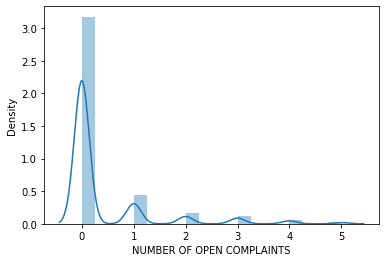

In [27]:
sns.distplot(mkt_cust['NUMBER OF OPEN COMPLAINTS'], bins=20)


In [28]:
#  In this case, the median is yhe best choice to replace NaN as it mitigates the effect of outliers.
#Most of the customers do not have open complaints


mkt_cust['NUMBER OF OPEN COMPLAINTS'] = mkt_cust['NUMBER OF OPEN COMPLAINTS'].fillna(mkt_cust['NUMBER OF OPEN COMPLAINTS'].median())



/var/folders/f0/2kttb75n7ksfn0xybq11r6h40000gn/T/ipykernel_1652/3164976770.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_cust['NUMBER OF OPEN COMPLAINTS'] = mkt_cust['NUMBER OF OPEN COMPLAINTS'].fillna(mkt_cust['NUMBER OF OPEN COMPLAINTS'].median())


In [29]:
# Cleaning NaN for VEHICLE CLASS

print(mkt_cust['VEHICLE CLASS'].unique())

# Calculate the mode to see which value appears more often
mkt_cust['VEHICLE CLASS'].value_counts()

['Four-Door Car' 'SUV' 'Two-Door Car' 'Sports Car' 'Luxury Car'
 'Luxury SUV' nan]


Four-Door Car    5200
Two-Door Car     2112
SUV              2009
Sports Car        548
Luxury SUV        208
Luxury Car        188
Name: VEHICLE CLASS, dtype: int64

In [30]:
# Four-Door Car is the most common vehicle class. we will use this value to replace NaN

mkt_cust['VEHICLE CLASS'] = mkt_cust['VEHICLE CLASS'].fillna('Four-Door Car')

/var/folders/f0/2kttb75n7ksfn0xybq11r6h40000gn/T/ipykernel_1652/2420293577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_cust['VEHICLE CLASS'] = mkt_cust['VEHICLE CLASS'].fillna('Four-Door Car')


In [31]:
# Cleaning NaN for VEHICLE SIZE
print(mkt_cust['VEHICLE SIZE'].unique())

# Calculate the mode to see which value appears more often
mkt_cust['VEHICLE SIZE'].value_counts()

['Medsize' 'Small' 'Large' nan]


Medsize    7233
Small      1962
Large      1070
Name: VEHICLE SIZE, dtype: int64

In [32]:
# Medsize is the most common vehicle size. we will use this value to replace NaN

mkt_cust['VEHICLE SIZE'] = mkt_cust['VEHICLE SIZE'].fillna('Medsize')

/var/folders/f0/2kttb75n7ksfn0xybq11r6h40000gn/T/ipykernel_1652/3133425488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_cust['VEHICLE SIZE'] = mkt_cust['VEHICLE SIZE'].fillna('Medsize')


In [33]:
mkt_cust.shape

(10873, 25)

In [34]:
# Cleaning NaN for VEHICLE TYPE
#For more than 50% of the customers, the VEHICLE TYPE is unknow. Therefore we can remove the column
mkt_cust = mkt_cust.drop(['VEHICLE TYPE'], axis=1)


In [35]:
mkt_cust.isna().sum()

CUSTOMER                         0
STATE                            0
CUSTOMER LIFETIME VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE TO DATE                0
EMPLOYMENT STATUS                0
GENDER                           0
INCOME                           0
LOCATION CODE                    0
MARITAL STATUS                   0
MONTHLY PREMIUM AUTO             0
MONTHS SINCE LAST CLAIM          0
MONTHS SINCE POLICY INCEPTION    0
NUMBER OF OPEN COMPLAINTS        0
NUMBER OF POLICIES               0
POLICY TYPE                      0
POLICY                           0
RENEW OFFER TYPE                 0
SALES CHANNEL                    0
TOTAL CLAIM AMOUNT               0
VEHICLE CLASS                    0
VEHICLE SIZE                     0
dtype: int64

6. Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [36]:
mkt_cust

CUSTOMER       STATE  CUSTOMER LIFETIME VALUE RESPONSE  COVERAGE  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877  California              6857.519928       No     Basic   

      EDUCATION EFFECTIVE TO DATE EMPLOYMENT STATUS GENDER  INCOME  \
0       College           2/18/11          Employed      M   48029   
1       College           1/18/11        Unemployed      F       0   
2      Bachelor           2/10/11          Employed      M   22139   
3       College           1/11/11          Employed      M   49078   
4      Bachelor           1/17/11     Medical Leave      F   23675   
...         ...               ...               ...    ...     ...   
10905  Bachelor           1/19/11        Unemployed      F       0   
10906   College            1/6/11          Employed      F   61146   
10907  Bachelor            2/6/11          Employed      F   39837   
10908   College           2/13/11          Employed      F   64195   
10909  Bachelor            1/8/11        Unemployed      M       0   

      LOCATION CODE MARITAL STATUS  MONTHLY PREMIUM AUTO  \
0          Suburban        Married                    61   
1          Suburban         Single                    64   
2          Suburban         Single                   100   
3          Suburban         Single                    97   
4          Suburban        Married                   117   
...             ...            ...                   ...   
10905      Suburban        Married                   253   
10906         Urban        Married                    65   
10907         Rural        Married                   201   
10908         Urban       Divorced                   158   
10909      Suburban         Single                   101   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                     7.000000                             52   
1                     3.000000                             26   
2                    34.000000                             31   
3                    10.000000                              3   
4                    15.145073                             31   
...                        ...                            ...   
10905                15.145073                             40   
10906                 7.000000                             68   
10907                11.000000                             63   
10908                 0.000000                             27   
10909                31.000000                              1   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES     POLICY TYPE  \
0                            0.0                   9  Corporate Auto   
1                            0.0                   1   Personal Auto   
2                            0.0                   2   Personal Auto   
3                            0.0                   2  Corporate Auto   
4                            0.0                   7   Personal Auto   
...                          ...                 ...             ...   
10905                        0.0                   7   Personal Auto   
10906                        0.0                   6   Personal Auto   
10907                        0.0                   2  Corporate Auto   
10908                        4.0                   6  

In [37]:
mkt_cust['EFFECTIVE TO DATE'] = pd.to_datetime(mkt_cust['EFFECTIVE TO DATE'], errors='coerce')
mkt_cust

CUSTOMER       STATE  CUSTOMER LIFETIME VALUE RESPONSE  COVERAGE  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877  California              6857.519928       No     Basic   

      EDUCATION EFFECTIVE TO DATE EMPLOYMENT STATUS GENDER  INCOME  \
0       College        2011-02-18          Employed      M   48029   
1       College        2011-01-18        Unemployed      F       0   
2      Bachelor        2011-02-10          Employed      M   22139   
3       College        2011-01-11          Employed      M   49078   
4      Bachelor        2011-01-17     Medical Leave      F   23675   
...         ...               ...               ...    ...     ...   
10905  Bachelor        2011-01-19        Unemployed      F       0   
10906   College        2011-01-06          Employed      F   61146   
10907  Bachelor        2011-02-06          Employed      F   39837   
10908   College        2011-02-13          Employed      F   64195   
10909  Bachelor        2011-01-08        Unemployed      M       0   

      LOCATION CODE MARITAL STATUS  MONTHLY PREMIUM AUTO  \
0          Suburban        Married                    61   
1          Suburban         Single                    64   
2          Suburban         Single                   100   
3          Suburban         Single                    97   
4          Suburban        Married                   117   
...             ...            ...                   ...   
10905      Suburban        Married                   253   
10906         Urban        Married                    65   
10907         Rural        Married                   201   
10908         Urban       Divorced                   158   
10909      Suburban         Single                   101   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                     7.000000                             52   
1                     3.000000                             26   
2                    34.000000                             31   
3                    10.000000                              3   
4                    15.145073                             31   
...                        ...                            ...   
10905                15.145073                             40   
10906                 7.000000                             68   
10907                11.000000                             63   
10908                 0.000000                             27   
10909                31.000000                              1   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES     POLICY TYPE  \
0                            0.0                   9  Corporate Auto   
1                            0.0                   1   Personal Auto   
2                            0.0                   2   Personal Auto   
3                            0.0                   2  Corporate Auto   
4                            0.0                   7   Personal Auto   
...                          ...                 ...             ...   
10905                        0.0                   7   Personal Auto   
10906                        0.0                   6   Personal Auto   
10907                        0.0                   2  Corporate Auto   
10908                        4.0                   6  

In [38]:
mkt_cust['MONTH'] = pd.DatetimeIndex(mkt_cust['EFFECTIVE TO DATE']).month
mkt_cust

CUSTOMER       STATE  CUSTOMER LIFETIME VALUE RESPONSE  COVERAGE  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877  California              6857.519928       No     Basic   

      EDUCATION EFFECTIVE TO DATE EMPLOYMENT STATUS GENDER  INCOME  \
0       College        2011-02-18          Employed      M   48029   
1       College        2011-01-18        Unemployed      F       0   
2      Bachelor        2011-02-10          Employed      M   22139   
3       College        2011-01-11          Employed      M   49078   
4      Bachelor        2011-01-17     Medical Leave      F   23675   
...         ...               ...               ...    ...     ...   
10905  Bachelor        2011-01-19        Unemployed      F       0   
10906   College        2011-01-06          Employed      F   61146   
10907  Bachelor        2011-02-06          Employed      F   39837   
10908   College        2011-02-13          Employed      F   64195   
10909  Bachelor        2011-01-08        Unemployed      M       0   

      LOCATION CODE MARITAL STATUS  MONTHLY PREMIUM AUTO  \
0          Suburban        Married                    61   
1          Suburban         Single                    64   
2          Suburban         Single                   100   
3          Suburban         Single                    97   
4          Suburban        Married                   117   
...             ...            ...                   ...   
10905      Suburban        Married                   253   
10906         Urban        Married                    65   
10907         Rural        Married                   201   
10908         Urban       Divorced                   158   
10909      Suburban         Single                   101   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                     7.000000                             52   
1                     3.000000                             26   
2                    34.000000                             31   
3                    10.000000                              3   
4                    15.145073                             31   
...                        ...                            ...   
10905                15.145073                             40   
10906                 7.000000                             68   
10907                11.000000                             63   
10908                 0.000000                             27   
10909                31.000000                              1   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES     POLICY TYPE  \
0                            0.0                   9  Corporate Auto   
1                            0.0                   1   Personal Auto   
2                            0.0                   2   Personal Auto   
3                            0.0                   2  Corporate Auto   
4                            0.0                   7   Personal Auto   
...                          ...                 ...             ...   
10905                        0.0                   7   Personal Auto   
10906                        0.0                   6   Personal Auto   
10907                        0.0                   2  Corporate Auto   
10908                        4.0                   6  

In [39]:
print(mkt_cust['MONTH'].unique())

[2 1]


In [40]:
mkt_cust[mkt_cust['MONTH'].isin([1,2])]

CUSTOMER       STATE  CUSTOMER LIFETIME VALUE RESPONSE  COVERAGE  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877  California              6857.519928       No     Basic   

      EDUCATION EFFECTIVE TO DATE EMPLOYMENT STATUS GENDER  INCOME  \
0       College        2011-02-18          Employed      M   48029   
1       College        2011-01-18        Unemployed      F       0   
2      Bachelor        2011-02-10          Employed      M   22139   
3       College        2011-01-11          Employed      M   49078   
4      Bachelor        2011-01-17     Medical Leave      F   23675   
...         ...               ...               ...    ...     ...   
10905  Bachelor        2011-01-19        Unemployed      F       0   
10906   College        2011-01-06          Employed      F   61146   
10907  Bachelor        2011-02-06          Employed      F   39837   
10908   College        2011-02-13          Employed      F   64195   
10909  Bachelor        2011-01-08        Unemployed      M       0   

      LOCATION CODE MARITAL STATUS  MONTHLY PREMIUM AUTO  \
0          Suburban        Married                    61   
1          Suburban         Single                    64   
2          Suburban         Single                   100   
3          Suburban         Single                    97   
4          Suburban        Married                   117   
...             ...            ...                   ...   
10905      Suburban        Married                   253   
10906         Urban        Married                    65   
10907         Rural        Married                   201   
10908         Urban       Divorced                   158   
10909      Suburban         Single                   101   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                     7.000000                             52   
1                     3.000000                             26   
2                    34.000000                             31   
3                    10.000000                              3   
4                    15.145073                             31   
...                        ...                            ...   
10905                15.145073                             40   
10906                 7.000000                             68   
10907                11.000000                             63   
10908                 0.000000                             27   
10909                31.000000                              1   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES     POLICY TYPE  \
0                            0.0                   9  Corporate Auto   
1                            0.0                   1   Personal Auto   
2                            0.0                   2   Personal Auto   
3                            0.0                   2  Corporate Auto   
4                            0.0                   7   Personal Auto   
...                          ...                 ...             ...   
10905                        0.0                   7   Personal Auto   
10906                        0.0                   6   Personal Auto   
10907                        0.0                   2  Corporate Auto   
10908                        4.0                   6  

7. BONUS

In [41]:
#def round2(x):
    
    #mkt_cust = pd.read_csv('marketing_customer_analysis.csv')

# --> remove Unnamed: 0 column
    #mkt_cust = mkt_cust.drop(['Unnamed: 0'], axis=1)
# --> standardize headers by capitalize all characters
    #mkt_cust.columns = list(map(lambda el: el.upper(), mkt_cust.columns))
# --> standardize headers by adding a splace before a Capiltal letter



    
# --> check data types. Show columns that have categorical and numerical values 
    #mkt_cust.dtypes
    #mkt_cust.select_dtypes('object')
    #mkt_cust.select_dtypes('number')
    
    
    
# --> Remove duplicates
    #mkt_cust = mkt_cust.drop_duplicates()
    #mkt_cust.reset_index(drop=True)
    
    
# --> Deal with NaN

    #nulls_df = pd.DataFrame(round(df.isna().sum()/len(df),4)*100) #creates a new dataframe (or table) with the percentages calculated above
    #nulls_df
    
    #nulls_df = nulls_df.reset_index() #in this case we do not use drop as we want to keep the original index
    #nulls_df
    
    #nulls_df.columns = ['header_name', 'percent_nulls'] #rename headers
    #nulls_df
    
    #nulls_df = nulls_df[nulls_df['percent_nulls'] > 0]
    #nulls_df['header_name'].unique()

EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:

1. Show DataFrame info.




In [42]:
mkt_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10873 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   CUSTOMER                       10873 non-null  object        
 1   STATE                          10873 non-null  object        
 2   CUSTOMER LIFETIME VALUE        10873 non-null  float64       
 3   RESPONSE                       10873 non-null  object        
 4   COVERAGE                       10873 non-null  object        
 5   EDUCATION                      10873 non-null  object        
 6   EFFECTIVE TO DATE              10873 non-null  datetime64[ns]
 7   EMPLOYMENT STATUS              10873 non-null  object        
 8   GENDER                         10873 non-null  object        
 9   INCOME                         10873 non-null  int64         
 10  LOCATION CODE                  10873 non-null  object        
 11  MARITAL STATUS 

2. Describe DataFrame.

In [43]:
mkt_cust.describe()

CUSTOMER LIFETIME VALUE        INCOME  MONTHLY PREMIUM AUTO  \
count             10873.000000  10873.000000          10873.000000   
mean               8016.881720  37537.101444             93.216684   
std                6884.829202  30362.078350             34.454801   
min                1898.007675      0.000000             61.000000   
25%                4014.453113      0.000000             68.000000   
50%                5768.830622  33811.000000             83.000000   
75%                8996.774075  62262.000000            109.000000   
max               83325.381190  99981.000000            298.000000   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
count             10873.000000                   10873.000000   
mean                 15.145073                      48.098777   
std                   9.785857                      27.929932   
min                   0.000000                       0.000000   
25%                   7.000000                      24.000000   
50%                  15.000000                      48.000000   
75%                  23.000000                      71.000000   
max                  35.000000                      99.000000   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES  TOTAL CLAIM AMOUNT  \
count               10873.000000        10873.000000        10873.000000   
mean                    0.361538            2.977467          434.902879   
std                     0.889177            2.397752          292.233402   
min                     0.000000            1.000000            0.099007   
25%                     0.000000            1.000000          271.014511   
50%                     0.000000            2.000000          383.363758   
75%                     0.000000            4.000000          547.200000   
max                     5.000000            9.000000         2893.239678   

              MONTH  
count  10873.000000  
mean       1.466661  
std        0.498910  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max        2.000000

In [44]:
mkt_cust.describe().T

count          mean           std  \
CUSTOMER LIFETIME VALUE        10873.0   8016.881720   6884.829202   
INCOME                         10873.0  37537.101444  30362.078350   
MONTHLY PREMIUM AUTO           10873.0     93.216684     34.454801   
MONTHS SINCE LAST CLAIM        10873.0     15.145073      9.785857   
MONTHS SINCE POLICY INCEPTION  10873.0     48.098777     27.929932   
NUMBER OF OPEN COMPLAINTS      10873.0      0.361538      0.889177   
NUMBER OF POLICIES             10873.0      2.977467      2.397752   
TOTAL CLAIM AMOUNT             10873.0    434.902879    292.233402   
MONTH                          10873.0      1.466661      0.498910   

                                       min          25%           50%  \
CUSTOMER LIFETIME VALUE        1898.007675  4014.453113   5768.830622   
INCOME                            0.000000     0.000000  33811.000000   
MONTHLY PREMIUM AUTO             61.000000    68.000000     83.000000   
MONTHS SINCE LAST CLAIM           0.000000     7.000000     15.000000   
MONTHS SINCE POLICY INCEPTION     0.000000    24.000000     48.000000   
NUMBER OF OPEN COMPLAINTS         0.000000     0.000000      0.000000   
NUMBER OF POLICIES                1.000000     1.000000      2.000000   
TOTAL CLAIM AMOUNT                0.099007   271.014511    383.363758   
MONTH                             1.000000     1.000000      1.000000   

                                        75%           max  
CUSTOMER LIFETIME VALUE         8996.774075  83325.381190  
INCOME                         62262.000000  99981.000000  
MONTHLY PREMIUM AUTO             109.000000    298.000000  
MONTHS SINCE LAST CLAIM           23.000000     35.000000  
MONTHS SINCE POLICY INCEPTION     71.000000     99.000000  
NUMBER OF OPEN COMPLAINTS          0.000000      5.000000  
NUMBER OF POLICIES                 4.000000      9.000000  
TOTAL CLAIM AMOUNT               547.200000   2893.239678  
MONTH                              2.000000      2.000000

3. Show a plot of the total number of responses.

<AxesSubplot:xlabel='RESPONSE', ylabel='count'>

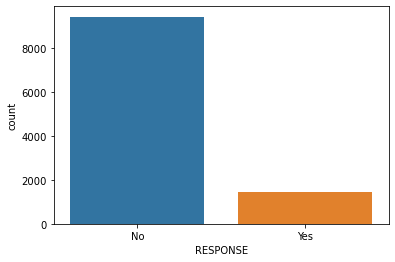

In [45]:

sns.countplot(x=mkt_cust['RESPONSE'])

<AxesSubplot:>

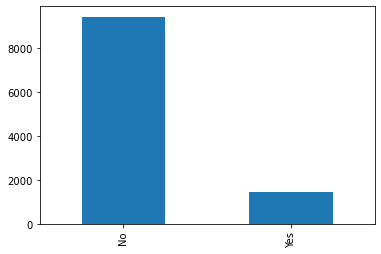

In [46]:
#Alternative way to show response counts
mkt_cust['RESPONSE'].value_counts().plot(kind="bar")



4. Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='RESPONSE', ylabel='count'>

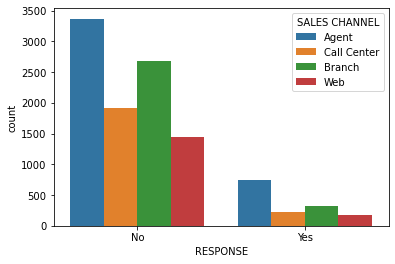

In [47]:
#to be reviewed. Not done with response rate
sns.countplot(data=mkt_cust, x='RESPONSE', hue='SALES CHANNEL')

5. Show a plot of the response rate by the total claim amount.

<AxesSubplot:xlabel='RESPONSE', ylabel='TOTAL CLAIM AMOUNT'>

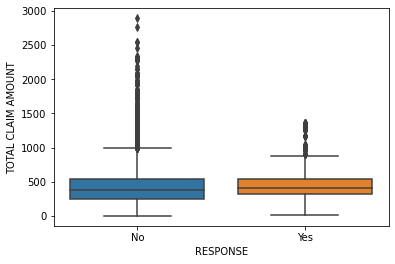

In [48]:
#to be reviewed. Not done with response rate
sns.boxplot(x = 'RESPONSE',y='TOTAL CLAIM AMOUNT', data=mkt_cust)

# For 75% of customers who said No, total claimed amount is less than 500.
# For customers who said Yes, the boxplot is shorter, so the claim amount is in general higher. 

6. Show a plot of the response rate by income.

<AxesSubplot:xlabel='RESPONSE', ylabel='INCOME'>

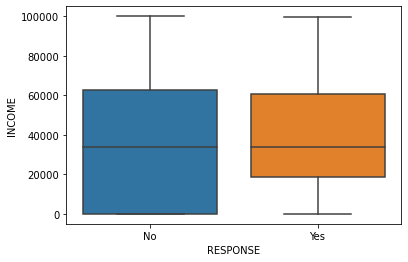

In [49]:
#to be reviewed. Not done with response rate
sns.boxplot(x = 'RESPONSE',y='INCOME', data=mkt_cust)

# Lab | Customer Analysis Round 4

1. Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)

In [50]:
numerical = pd.DataFrame(mkt_cust.select_dtypes('number'))
numerical = numerical.drop(['MONTH'], axis=1) #Month is not part of the original data set
numerical

CUSTOMER LIFETIME VALUE  INCOME  MONTHLY PREMIUM AUTO  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10905             15563.369440       0                   253   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   
10909              6857.519928       0                   101   

       MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0                     7.000000                             52   
1                     3.000000                             26   
2                    34.000000                             31   
3                    10.000000                              3   
4                    15.145073                             31   
...                        ...                            ...   
10905                15.145073                             40   
10906                 7.000000                             68   
10907                11.000000                             63   
10908                 0.000000                             27   
10909                31.000000                              1   

       NUMBER OF OPEN COMPLAINTS  NUMBER OF POLICIES  TOTAL CLAIM AMOUNT  
0                            0.0                   9          292.800000  
1                            0.0                   1          744.924331  
2                            0.0                   2          480.000000  
3                            0.0                   2          484.013411  
4                            0.0                   7          707.925645  
...                          ...                 ...                 ...  
10905                        0.0                   7         1214.400000  
10906                        0.0                   6          273.018929  
10907                        0.0                   2          381.306996  
10908                        4.0                   6          618.288849  
10909                        0.0                   3         1021.719397  

[10873 rows x 8 columns]

In [51]:
categorical = pd.DataFrame(mkt_cust.select_dtypes(include = object))
categorical

CUSTOMER       STATE RESPONSE  COVERAGE EDUCATION EMPLOYMENT STATUS  \
0      DK49336     Arizona       No     Basic   College          Employed   
1      KX64629  California       No     Basic   College        Unemployed   
2      LZ68649  Washington       No     Basic  Bachelor          Employed   
3      XL78013      Oregon      Yes  Extended   College          Employed   
4      QA50777      Oregon       No   Premium  Bachelor     Medical Leave   
...        ...         ...      ...       ...       ...               ...   
10905  FE99816      Nevada       No   Premium  Bachelor        Unemployed   
10906  KX53892      Oregon       No     Basic   College          Employed   
10907  TL39050     Arizona       No  Extended  Bachelor          Employed   
10908  WA60547  California       No   Premium   College          Employed   
10909  IV32877  California       No     Basic  Bachelor        Unemployed   

      GENDER LOCATION CODE MARITAL STATUS     POLICY TYPE        POLICY  \
0          M      Suburban        Married  Corporate Auto  Corporate L3   
1          F      Suburban         Single   Personal Auto   Personal L3   
2          M      Suburban         Single   Personal Auto   Personal L3   
3          M      Suburban         Single  Corporate Auto  Corporate L3   
4          F      Suburban        Married   Personal Auto   Personal L2   
...      ...           ...            ...             ...           ...   
10905      F      Suburban        Married   Personal Auto   Personal L1   
10906      F         Urban        Married   Personal Auto   Personal L3   
10907      F         Rural        Married  Corporate Auto  Corporate L3   
10908      F         Urban       Divorced   Personal Auto   Personal L1   
10909      M      Suburban         Single   Personal Auto   Personal L1   

      RENEW OFFER TYPE SALES CHANNEL  VEHICLE CLASS VEHICLE SIZE  
0               Offer3         Agent  Four-Door Car      Medsize  
1               Offer4   Call Center  Four-Door Car      Medsize  
2               Offer3   Call Center            SUV      Medsize  
3               Offer2        Branch  Four-Door Car      Medsize  
4               Offer1        Branch  Four-Door Car      Medsize  
...                ...           ...            ...          ...  
10905           Offer3           Web     Luxury Car      Medsize  
10906           Offer2        Branch  Four-Door Car      Medsize  
10907           Offer1           Web     Luxury SUV      Medsize  
10908           Offer1        Branch            SUV      Medsize  
10909           Offer4           Web            SUV      Medsize  

[10873 rows x 15 columns]

2. Now we will try to check the normality of the numerical variables visually
     - Use seaborn library to construct distribution plots for the numerical variables
     - Use Matplotlib to construct histograms
     - Do the distributions for different numerical variables look like a normal distribution

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats

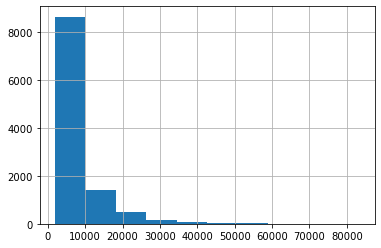

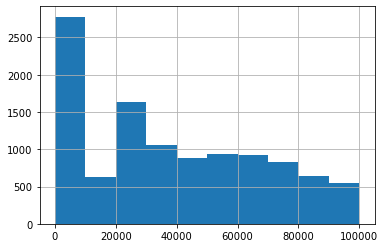

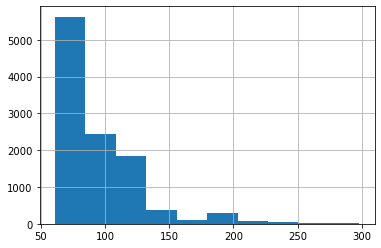

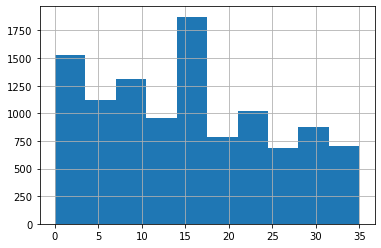

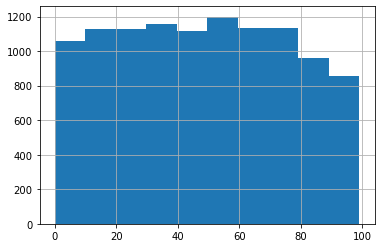

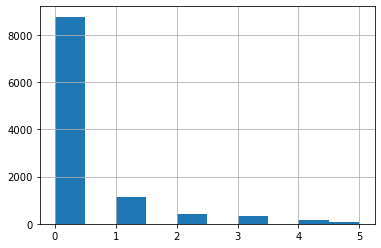

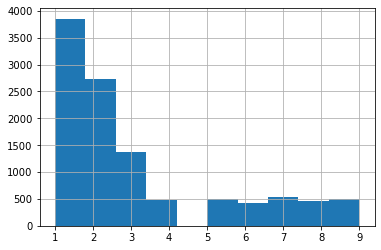

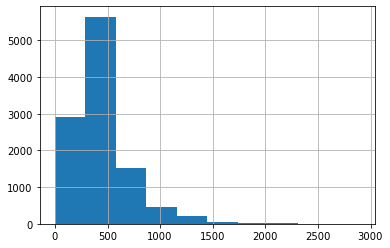

In [53]:
for i in range(len(numerical.columns)):
    numerical.iloc[:,i].hist()
    plt.show()

In [54]:
numerical.skew()

# Xheck which variable is normally distributed and which is not.

        #The variables with skewness > 1 are highly positively skewed.
        #The variables with skewness < -1 are highly negatively skewed.
        #The variables with 0.5 < skewness < 1 such are moderately positively skewed.
        #The variables with -0.5 < skewness < -1 are moderately negatively skewed.
        #And, the variables with -0.5 < skewness < 0.5 are symmetric i.e normally distributed

CUSTOMER LIFETIME VALUE          3.003669
INCOME                           0.285831
MONTHLY PREMIUM AUTO             2.115229
MONTHS SINCE LAST CLAIM          0.279225
MONTHS SINCE POLICY INCEPTION    0.033173
NUMBER OF OPEN COMPLAINTS        2.915822
NUMBER OF POLICIES               1.243220
TOTAL CLAIM AMOUNT               1.727339
dtype: float64

In [55]:
#The distributions that need to look like a normal distribution are:
    #CUSTOMER LIFETIME VALUE
    #MONTHLY PREMIUM AUTO
    #NUMBER OF OPEN COMPLAINTS
    #NUMBER OF POLICIES
    

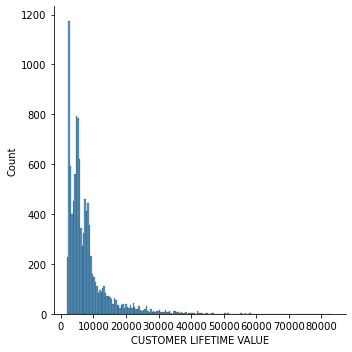

In [56]:
#original distribution - CUSTOMER LIFETIME VALUE

sns.displot(numerical['CUSTOMER LIFETIME VALUE'])
plt.show()

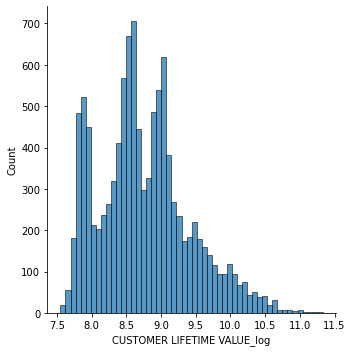

In [57]:
# Fit CUSTOMER LIFETIME VALUE data into normal distribution - option 1
numerical['CUSTOMER LIFETIME VALUE_log'] = np.log(numerical['CUSTOMER LIFETIME VALUE'])
sns.displot(numerical['CUSTOMER LIFETIME VALUE_log'])
plt.show()

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: -0.3478949370330968


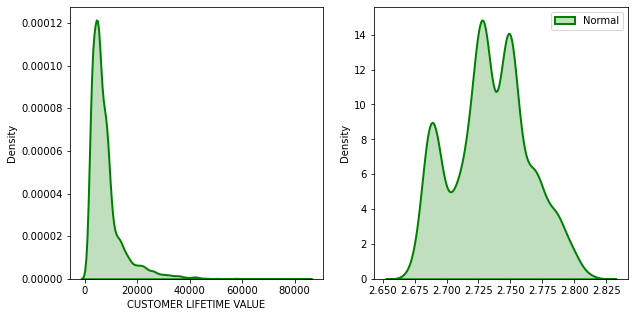

In [58]:
# Fit CUSTOMER LIFETIME VALUE data into normal distribution - option 2

import scipy.stats as stats

#transform training data & save lambda value
CLV_boxcox, fitted_lambda = stats.boxcox(numerical['CUSTOMER LIFETIME VALUE'])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(numerical['CUSTOMER LIFETIME VALUE'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(CLV_boxcox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
numerical['CLV_boxcox'] = CLV_boxcox

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")
 


/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: -1.459143119381647


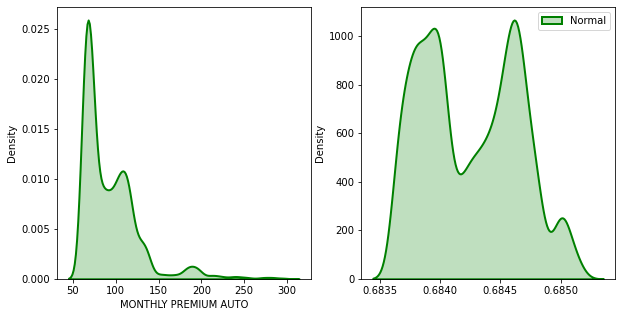

In [59]:
# Fit MONTHLY PREMIUM AUTO data into normal distribution

#transform training data & save lambda value
M_Premium_Auto_boxcox, fitted_lambda2 = stats.boxcox(numerical['MONTHLY PREMIUM AUTO'])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(numerical['MONTHLY PREMIUM AUTO'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(M_Premium_Auto_boxcox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
numerical['M_Premium_Auto_boxcox'] = M_Premium_Auto_boxcox

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda2}")
 

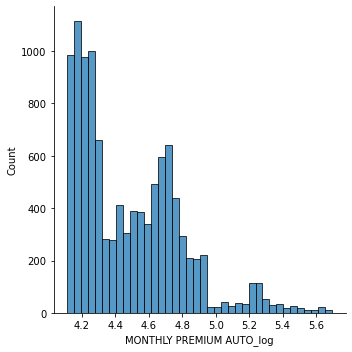

In [60]:
# Fit MONTHLY PREMIUM AUTO data into normal distribution - option 2

numerical['MONTHLY PREMIUM AUTO_log'] = np.log(numerical['MONTHLY PREMIUM AUTO'])
sns.displot(numerical['MONTHLY PREMIUM AUTO_log'])
plt.show()

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: -0.38595850700249573


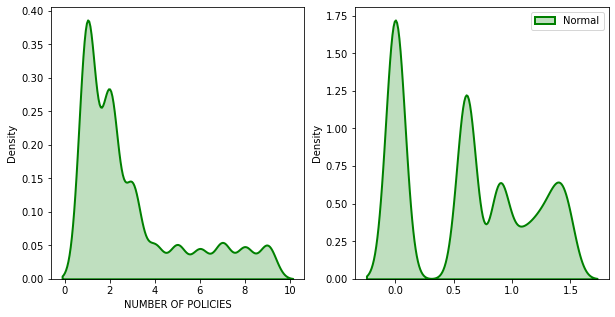

In [61]:
# Fit NUMBER OF POLICIES data into normal distribution

#transform training data & save lambda value
NUMBER_OF_POLICIES_boxcox, fitted_lambda3 = stats.boxcox(numerical['NUMBER OF POLICIES'])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(numerical['NUMBER OF POLICIES'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(NUMBER_OF_POLICIES_boxcox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
numerical['NUMBER_OF_POLICIES_boxcox'] = NUMBER_OF_POLICIES_boxcox

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda3}")
 

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Lambda value used for Transformation: 0.12018148438320907


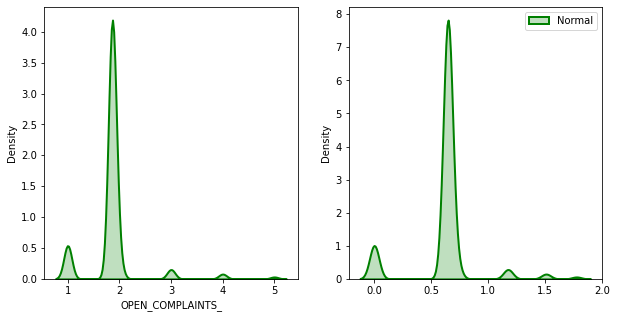

In [62]:
# Fit NUMBER OF OPEN COMPLAINTS data into normal distribution


#transform training data & save lambda value

numerical['OPEN_COMPLAINTS_'] = np.where(numerical['NUMBER OF OPEN COMPLAINTS']<=0,0,numerical['NUMBER OF OPEN COMPLAINTS'])
mean = np.sum(numerical['OPEN_COMPLAINTS_'] )/len(numerical[numerical['OPEN_COMPLAINTS_'] >0])
numerical['OPEN_COMPLAINTS_'] = numerical['OPEN_COMPLAINTS_'].replace(0,mean)

OPEN_COMPLAINTS_boxcox, fitted_lambda4 = stats.boxcox(numerical['OPEN_COMPLAINTS_'])

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(numerical['OPEN_COMPLAINTS_'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(OPEN_COMPLAINTS_boxcox, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
numerical['OPEN_COMPLAINTS_boxcox'] = OPEN_COMPLAINTS_boxcox

# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda4}")
 

In [63]:
numerical.columns

Index(['CUSTOMER LIFETIME VALUE', 'INCOME', 'MONTHLY PREMIUM AUTO',
       'MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION',
       'NUMBER OF OPEN COMPLAINTS', 'NUMBER OF POLICIES', 'TOTAL CLAIM AMOUNT',
       'CUSTOMER LIFETIME VALUE_log', 'CLV_boxcox', 'M_Premium_Auto_boxcox',
       'MONTHLY PREMIUM AUTO_log', 'NUMBER_OF_POLICIES_boxcox',
       'OPEN_COMPLAINTS_', 'OPEN_COMPLAINTS_boxcox'],
      dtype='object')

In [64]:
# Create new data frame to include new features with normalized data

numerical2 = numerical.drop(['CUSTOMER LIFETIME VALUE','MONTHLY PREMIUM AUTO','NUMBER OF OPEN COMPLAINTS', 'NUMBER OF POLICIES','CUSTOMER LIFETIME VALUE_log','OPEN_COMPLAINTS_','MONTHLY PREMIUM AUTO_log'], axis=1)

In [65]:
numerical2

INCOME  MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0       48029                 7.000000                             52   
1           0                 3.000000                             26   
2       22139                34.000000                             31   
3       49078                10.000000                              3   
4       23675                15.145073                             31   
...       ...                      ...                            ...   
10905       0                15.145073                             40   
10906   61146                 7.000000                             68   
10907   39837                11.000000                             63   
10908   64195                 0.000000                             27   
10909       0                31.000000                              1   

       TOTAL CLAIM AMOUNT  CLV_boxcox  M_Premium_Auto_boxcox  \
0              292.800000    2.723917               0.683632   
1              744.924331    2.677736               0.683747   
2              480.000000    2.772985               0.684507   
3              484.013411    2.786209               0.684469   
4              707.925645    2.753519               0.684676   
...                   ...         ...                    ...   
10905         1214.400000    2.774399               0.685120   
10906          273.018929    2.728531               0.683783   
10907          381.306996    2.788258               0.685035   
10908          618.288849    2.764839               0.684909   
10909         1021.719397    2.741395               0.684518   

       NUMBER_OF_POLICIES_boxcox  OPEN_COMPLAINTS_boxcox  
0                       1.481365                0.646571  
1                       0.000000                0.646571  
2                       0.608173                0.646571  
3                       0.608173                0.646571  
4                       1.368346                0.646571  
...                          ...                     ...  
10905                   1.368346                0.646571  
10906                   1.293399                0.646571  
10907                   0.608173                0.646571  
10908                   1.293399                1.508467  
10909                   0.895403                0.646571  

[10873 rows x 8 columns]

3. For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

In [66]:
#Check if new features fit a normal distrubution

numerical2.skew()

INCOME                           0.285831
MONTHS SINCE LAST CLAIM          0.279225
MONTHS SINCE POLICY INCEPTION    0.033173
TOTAL CLAIM AMOUNT               1.727339
CLV_boxcox                       0.043873
M_Premium_Auto_boxcox            0.175927
NUMBER_OF_POLICIES_boxcox        0.129646
OPEN_COMPLAINTS_boxcox           0.045949
dtype: float64

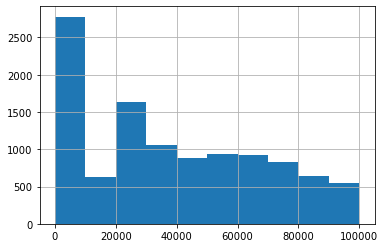

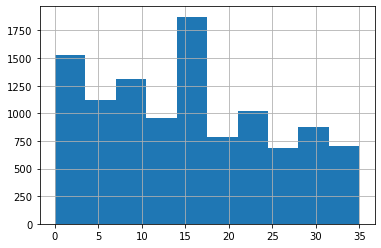

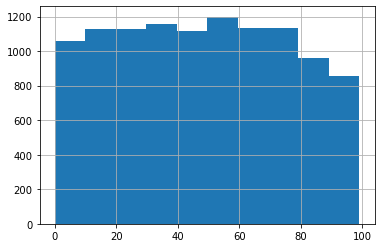

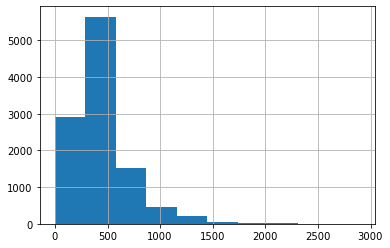

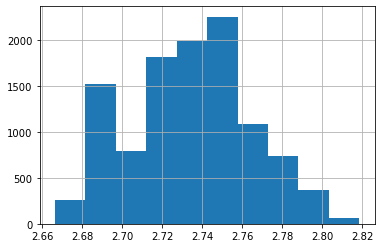

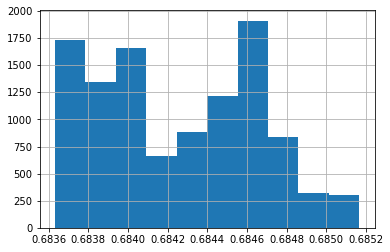

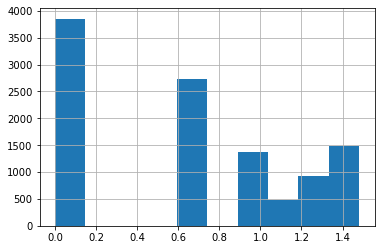

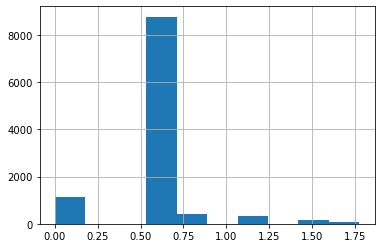

In [67]:

for i in range(len(numerical2.columns)):
    numerical2.iloc[:,i].hist()
    plt.show()

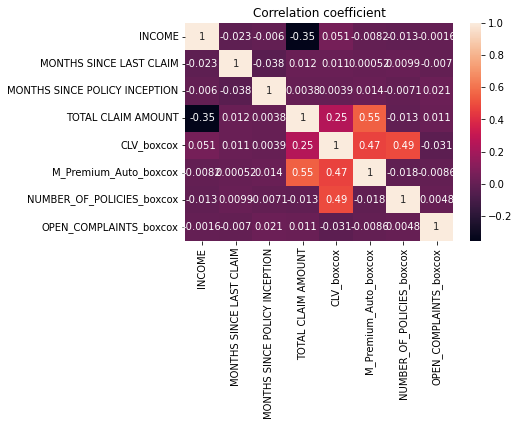

In [68]:
#Detecting coefficient

    #target = total_claim_amount

sns.heatmap(numerical2.corr(),annot=True)
plt.title('Correlation coefficient')
plt.show()

In [69]:
#From the heatmap there is no strong correlations between features. However we can see some correlarion between:
    #Monthly Premium Auto and Customer Lifetime Value
    #Number of policies and Customer Lifetime Value

In [70]:
numerical2.columns

Index(['INCOME', 'MONTHS SINCE LAST CLAIM', 'MONTHS SINCE POLICY INCEPTION',
       'TOTAL CLAIM AMOUNT', 'CLV_boxcox', 'M_Premium_Auto_boxcox',
       'NUMBER_OF_POLICIES_boxcox', 'OPEN_COMPLAINTS_boxcox'],
      dtype='object')

In [71]:
# VIF Variance Influence factor
# if it exceeds 5 or 10 it means that VIf is high so that variable is likely to be contributing for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# create new data frame with independent variables
numerical3 = numerical2.drop(['TOTAL CLAIM AMOUNT'], axis=1)

# create new data frame for VIF 
VIF_data = pd.DataFrame()
VIF_data["feature"] = numerical3.columns

# calculate VIF for each feature
VIF_data["VIF"] = [variance_inflation_factor(numerical3.values, i)
                          for i in range(len(numerical3.columns))]

VIF_data["Correlation"] = VIF_data["VIF"] > 5
  
print(VIF_data)



                         feature           VIF  Correlation
0                         INCOME      2.542445        False
1        MONTHS SINCE LAST CLAIM      3.402777        False
2  MONTHS SINCE POLICY INCEPTION      3.974121        False
3                     CLV_boxcox  11588.665447         True
4          M_Premium_Auto_boxcox  11452.000815         True
5      NUMBER_OF_POLICIES_boxcox      3.169040        False
6         OPEN_COMPLAINTS_boxcox      6.406767         True


In [72]:
# based on the analysis the variable that are likely to be contributing for multicollinearity are:
    # Customer Lifetime Value
    # Monthly Premium Auto
    


4. Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [73]:
# As shown in heatmap, there are no features with Correlation coefficient greater than 0.9

# Lab | Customer Analysis Round 5

1. Processing Data - X-y split.

In [74]:
numerical2

INCOME  MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0       48029                 7.000000                             52   
1           0                 3.000000                             26   
2       22139                34.000000                             31   
3       49078                10.000000                              3   
4       23675                15.145073                             31   
...       ...                      ...                            ...   
10905       0                15.145073                             40   
10906   61146                 7.000000                             68   
10907   39837                11.000000                             63   
10908   64195                 0.000000                             27   
10909       0                31.000000                              1   

       TOTAL CLAIM AMOUNT  CLV_boxcox  M_Premium_Auto_boxcox  \
0              292.800000    2.723917               0.683632   
1              744.924331    2.677736               0.683747   
2              480.000000    2.772985               0.684507   
3              484.013411    2.786209               0.684469   
4              707.925645    2.753519               0.684676   
...                   ...         ...                    ...   
10905         1214.400000    2.774399               0.685120   
10906          273.018929    2.728531               0.683783   
10907          381.306996    2.788258               0.685035   
10908          618.288849    2.764839               0.684909   
10909         1021.719397    2.741395               0.684518   

       NUMBER_OF_POLICIES_boxcox  OPEN_COMPLAINTS_boxcox  
0                       1.481365                0.646571  
1                       0.000000                0.646571  
2                       0.608173                0.646571  
3                       0.608173                0.646571  
4                       1.368346                0.646571  
...                          ...                     ...  
10905                   1.368346                0.646571  
10906                   1.293399                0.646571  
10907                   0.608173                0.646571  
10908                   1.293399                1.508467  
10909                   0.895403                0.646571  

[10873 rows x 8 columns]

In [75]:
print(numerical2.shape)
print(categorical.shape)

(10873, 8)
(10873, 15)


In [76]:
mkt_cust_normal = pd.concat([numerical2, categorical], axis=1)
mkt_cust_normal.shape

(10873, 23)

In [77]:
y = mkt_cust_normal['TOTAL CLAIM AMOUNT']
X = mkt_cust_normal.drop(['TOTAL CLAIM AMOUNT'], axis=1)
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(object)



In [78]:
print(X_num.shape)
print(mkt_cust_normal.shape)

(10873, 7)
(10873, 23)


In [79]:
from sklearn.preprocessing import MinMaxScaler

transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
x_normalized
x_normalized = pd.DataFrame(x_normalized, columns=X_num.columns)

(10873, 7)


In [80]:
x_normalized

INCOME  MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0      0.480381                 0.200000                       0.525253   
1      0.000000                 0.085714                       0.262626   
2      0.221432                 0.971429                       0.313131   
3      0.490873                 0.285714                       0.030303   
4      0.236795                 0.432716                       0.313131   
...         ...                      ...                            ...   
10868  0.000000                 0.432716                       0.404040   
10869  0.611576                 0.200000                       0.686869   
10870  0.398446                 0.314286                       0.636364   
10871  0.642072                 0.000000                       0.272727   
10872  0.000000                 0.885714                       0.010101   

       CLV_boxcox  M_Premium_Auto_boxcox  NUMBER_OF_POLICIES_boxcox  \
0        0.377673               0.000000                   1.000000   
1        0.074234               0.075073                   0.000000   
2        0.700078               0.570199                   0.410549   
3        0.786968               0.545682                   0.410549   
4        0.572174               0.680648                   0.923706   
...           ...                    ...                        ...   
10868    0.709369               0.970416                   0.923706   
10869    0.407989               0.098215                   0.873113   
10870    0.800433               0.914868                   0.410549   
10871    0.646557               0.832902                   0.873113   
10872    0.492515               0.577974                   0.604445   

       OPEN_COMPLAINTS_boxcox  
0                    0.364136  
1                    0.364136  
2                    0.364136  
3                    0.364136  
4                    0.364136  
...                       ...  
10868                0.364136  
10869                0.364136  
10870                0.364136  
10871                0.849539  
10872                0.364136  

[10873 rows x 7 columns]

# Lab | Customer Analysis Round 6

Processing Data

1. One Hot/Label Encoding (categorical).

In [81]:
X_cat

CUSTOMER       STATE RESPONSE  COVERAGE EDUCATION EMPLOYMENT STATUS  \
0      DK49336     Arizona       No     Basic   College          Employed   
1      KX64629  California       No     Basic   College        Unemployed   
2      LZ68649  Washington       No     Basic  Bachelor          Employed   
3      XL78013      Oregon      Yes  Extended   College          Employed   
4      QA50777      Oregon       No   Premium  Bachelor     Medical Leave   
...        ...         ...      ...       ...       ...               ...   
10905  FE99816      Nevada       No   Premium  Bachelor        Unemployed   
10906  KX53892      Oregon       No     Basic   College          Employed   
10907  TL39050     Arizona       No  Extended  Bachelor          Employed   
10908  WA60547  California       No   Premium   College          Employed   
10909  IV32877  California       No     Basic  Bachelor        Unemployed   

      GENDER LOCATION CODE MARITAL STATUS     POLICY TYPE        POLICY  \
0          M      Suburban        Married  Corporate Auto  Corporate L3   
1          F      Suburban         Single   Personal Auto   Personal L3   
2          M      Suburban         Single   Personal Auto   Personal L3   
3          M      Suburban         Single  Corporate Auto  Corporate L3   
4          F      Suburban        Married   Personal Auto   Personal L2   
...      ...           ...            ...             ...           ...   
10905      F      Suburban        Married   Personal Auto   Personal L1   
10906      F         Urban        Married   Personal Auto   Personal L3   
10907      F         Rural        Married  Corporate Auto  Corporate L3   
10908      F         Urban       Divorced   Personal Auto   Personal L1   
10909      M      Suburban         Single   Personal Auto   Personal L1   

      RENEW OFFER TYPE SALES CHANNEL  VEHICLE CLASS VEHICLE SIZE  
0               Offer3         Agent  Four-Door Car      Medsize  
1               Offer4   Call Center  Four-Door Car      Medsize  
2               Offer3   Call Center            SUV      Medsize  
3               Offer2        Branch  Four-Door Car      Medsize  
4               Offer1        Branch  Four-Door Car      Medsize  
...                ...           ...            ...          ...  
10905           Offer3           Web     Luxury Car      Medsize  
10906           Offer2        Branch  Four-Door Car      Medsize  
10907           Offer1           Web     Luxury SUV      Medsize  
10908           Offer1        Branch            SUV      Medsize  
10909           Offer4           Web            SUV      Medsize  

[10873 rows x 15 columns]

In [82]:
from sklearn.preprocessing import OneHotEncoder

encoder2 = OneHotEncoder(drop='first').fit(X_cat)
encoded_for_p2 = encoder2.transform(X_cat).toarray()
encoded_for_p2
cols = encoder2.get_feature_names(input_features=X_cat.columns)
cols


onehot_encoded_for_p2 = pd.DataFrame(encoded_for_p2, columns=cols)
onehot_encoded_for_p2.head()

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


CUSTOMER_AA11235  CUSTOMER_AA16582  CUSTOMER_AA30683  CUSTOMER_AA34092  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AA35519  CUSTOMER_AA56476  CUSTOMER_AA69265  CUSTOMER_AA71604  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AA93585  CUSTOMER_AB13432  CUSTOMER_AB21519  CUSTOMER_AB23825  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AB26022  CUSTOMER_AB31813  CUSTOMER_AB45325  CUSTOMER_AB60627  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AB62982  CUSTOMER_AB69140  CUSTOMER_AB72731  CUSTOMER_AB73565  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AB78984  CUSTOMER_AB96670  CUSTOMER_AB98823  CUSTOMER_AC13887  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AC22873  CUSTOMER_AC24378  CUSTOMER_AC40767  CUSTOMER_AC42963  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AC58002  CUSTOMER_AC67315  CUSTOMER_AC73173  CUSTOMER_AC75391  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   CUSTOMER_AC79024  CUSTOMER_AD12500  CUSTOMER_AD18174  CUSTOMER_AD28349  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0             

2. Concat DataFrames

In [83]:
mkt_cust_stand = pd.concat([x_normalized, onehot_encoded_for_p2], axis=1)
mkt_cust_stand

INCOME  MONTHS SINCE LAST CLAIM  MONTHS SINCE POLICY INCEPTION  \
0      0.480381                 0.200000                       0.525253   
1      0.000000                 0.085714                       0.262626   
2      0.221432                 0.971429                       0.313131   
3      0.490873                 0.285714                       0.030303   
4      0.236795                 0.432716                       0.313131   
...         ...                      ...                            ...   
10868  0.000000                 0.432716                       0.404040   
10869  0.611576                 0.200000                       0.686869   
10870  0.398446                 0.314286                       0.636364   
10871  0.642072                 0.000000                       0.272727   
10872  0.000000                 0.885714                       0.010101   

       CLV_boxcox  M_Premium_Auto_boxcox  NUMBER_OF_POLICIES_boxcox  \
0        0.377673               0.000000                   1.000000   
1        0.074234               0.075073                   0.000000   
2        0.700078               0.570199                   0.410549   
3        0.786968               0.545682                   0.410549   
4        0.572174               0.680648                   0.923706   
...           ...                    ...                        ...   
10868    0.709369               0.970416                   0.923706   
10869    0.407989               0.098215                   0.873113   
10870    0.800433               0.914868                   0.410549   
10871    0.646557               0.832902                   0.873113   
10872    0.492515               0.577974                   0.604445   

       OPEN_COMPLAINTS_boxcox  CUSTOMER_AA11235  CUSTOMER_AA16582  \
0                    0.364136               0.0               0.0   
1                    0.364136               0.0               0.0   
2                    0.364136               0.0               0.0   
3                    0.364136               0.0               0.0   
4                    0.364136               0.0               0.0   
...                       ...               ...               ...   
10868                0.364136               0.0               0.0   
10869                0.364136               0.0               0.0   
10870                0.364136               0.0               0.0   
10871                0.849539               0.0               0.0   
10872                0.364136               0.0               0.0   

       CUSTOMER_AA30683  CUSTOMER_AA34092  CUSTOMER_AA35519  CUSTOMER_AA56476  \
0                   0.0               0.0               0.0               0.0   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0               0.0               0.0   
...                 ...               ...               ...               ...   
10868               0.0               0.0               0.0               0.0   
10869               0.0               0.0               0.0               0.0   
10870               0.0               0.0               0.0               0.0   
10871               0.0               0.0               0.0               0.0   
10872               0.0               0.0               0.0               0.0   

       CUSTOMER_AA69265  CUSTOMER_AA71604  CUSTOMER_AA93585  CUSTOMER_AB13432  \
0                   0.0               0.0               0.0               0.0   
1                   0.0               0.0               0.0               0.0   
2                   0.0               0.0               0.0               0.0   
3                   0.0               0.0               0.0               0.0   
4                   0.0               0.0       

In [84]:
mkt_cust_stand.describe().T

count      mean       std  min       25%  \
INCOME                         10873.0  0.375442  0.303678  0.0  0.000000   
MONTHS SINCE LAST CLAIM        10873.0  0.432716  0.279596  0.0  0.200000   
MONTHS SINCE POLICY INCEPTION  10873.0  0.485846  0.282121  0.0  0.242424   
CLV_boxcox                     10873.0  0.444200  0.198165  0.0  0.313530   
M_Premium_Auto_boxcox          10873.0  0.405116  0.262463  0.0  0.162661   
...                                ...       ...       ...  ...       ...   
VEHICLE CLASS_SUV              10873.0  0.184770  0.388128  0.0  0.000000   
VEHICLE CLASS_Sports Car       10873.0  0.050400  0.218779  0.0  0.000000   
VEHICLE CLASS_Two-Door Car     10873.0  0.194243  0.395635  0.0  0.000000   
VEHICLE SIZE_Medsize           10873.0  0.721144  0.448457  0.0  0.000000   
VEHICLE SIZE_Small             10873.0  0.180447  0.384577  0.0  0.000000   

                                    50%       75%  max  
INCOME                         0.338174  0.622738  1.0  
MONTHS SINCE LAST CLAIM        0.428571  0.657143  1.0  
MONTHS SINCE POLICY INCEPTION  0.484848  0.717172  1.0  
CLV_boxcox                     0.438329  0.571306  1.0  
M_Premium_Auto_boxcox          0.401658  0.633940  1.0  
...                                 ...       ...  ...  
VEHICLE CLASS_SUV              0.000000  0.000000  1.0  
VEHICLE CLASS_Sports Car       0.000000  0.000000  1.0  
VEHICLE CLASS_Two-Door Car     0.000000  0.000000  1.0  
VEHICLE SIZE_Medsize           1.000000  1.000000  1.0  
VEHICLE SIZE_Small             0.000000  0.000000  1.0  

[9183 rows x 8 columns]

Linear Regression
1. Train-test split.

In [85]:
y = mkt_cust_normal['TOTAL CLAIM AMOUNT']
y.head()

0    292.800000
1    744.924331
2    480.000000
3    484.013411
4    707.925645
Name: TOTAL CLAIM AMOUNT, dtype: float64

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mkt_cust_stand, y, test_size=0.2, random_state=42)


In [87]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8698, 9183)
(2175, 9183)
(8698,)
(2175,)


In [88]:
# perform linear regression
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [91]:
y_test[:5]

2755      83.390706
10244    368.963633
5162     595.200000
6200      12.444326
9564     693.414133
Name: TOTAL CLAIM AMOUNT, dtype: float64

In [92]:
predictions_test[:5]

array([  83.390706  ,  285.68095866,  724.70287717, -205.7376877 ,
        689.09514771])

# Model Validation



Description:
1. R2.
2. MSE.
3. RMSE.
4. MAE.

In [102]:
from sklearn.metrics import mean_absolute_error, r2_score

In [103]:
r2 = r2_score(y_test, predictions_test)
r2

0.6946923563673562

In [104]:


mse=mean_squared_error(y_test,predictions_test)
mse

26231.505833434454

In [105]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
rmse

161.9614331667711

In [106]:
mae = mean_absolute_error(y_test, predictions_test)
print(mae)

104.86885392749339


In [107]:
y_test.mean()

429.63680032046017